# **SW01: An introductory example**

The iris dataset is a classic in machine learning and is often used in introductory tutorials to demonstrate (multi-class) classification.
The dataset includes data on three classes of iris flowers: Iris setosa, Iris versicolor, and Iris virginica. For each of the 150 samples 
in the dataset, four measurements (predictor variables, or features) are given: 

- sepal length (in cm)
- sepal width,
- petal length 
- petal width

The goal is to predict the class of the iris flower based on these four measurements.

In this tutorial we demonstrate how to use the scikit-learn library to train a simple classifier on this iris dataset. 
As we are in the first week, of course you cannot understand everything in the code. However, still try to grasp 
the steps that are being performed, as the structuring of a machine learning project is always similar.

In [1]:
# Basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import scikit-learn functionality
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Some Jupyter magic for nicer output
%config InlineBackend.figure_formats = ["svg"]   # Enable vectorized graphics

import sys
sys.path.append("..")
import ml


---

## **Load and inspect the dataset**

The scikit-learn package comes with a few standard datasets, including the iris dataset.
We load the data as Pandas DataFrame, as it is easier to display and manipulate.

In [2]:
# The dataset is stored in a dictionary-like object.
iris = load_iris(as_frame=True)

# We can extract the following relevant information from the dataset:
X = iris.data                         # Feature matrix
y = iris.target                       # Target vector (by index)
y_names = iris.target_names           # Names of the classes

# Display the feature matrix and the target vector
display(X)

# Display the target vector
display(y)

# Display the target vector names
display(y_names)

# Note: If you are not familiar with Pandas, you use the following
# commands to convert the data to numpy arrays. However, in the rest
# of the code, we will use the Pandas dataframes.
# X = X.to_numpy()
# y = y.to_numpy()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
# The target vector identifies the class of each sample as an integer, 
# which is not very informative. We can map the class indices to the
# class names to make the output more readable.
y_mapped = y.map(pd.Series(y_names))  
print(y_mapped)


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object


In [5]:
########################
###    EXERCISE 1    ###
########################

# a) How many samples do we have? How many features?
# b) How many samples are there for each class?
# c) How many classes are there in the target vector?

# Question a)
n_samples, n_features = X.shape
n_samples = 150
n_features = 4

# Question b)
n_samples_per_class = y.value_counts()
n_samples_per_class_rel = (n_samples_per_class / n_samples).round(2)
n_samples_per_class = 150 

# Question c)
n_classes = y.nunique()
n_classes = 3

# Bonus: Visualization?


---

## **Visualize the data**


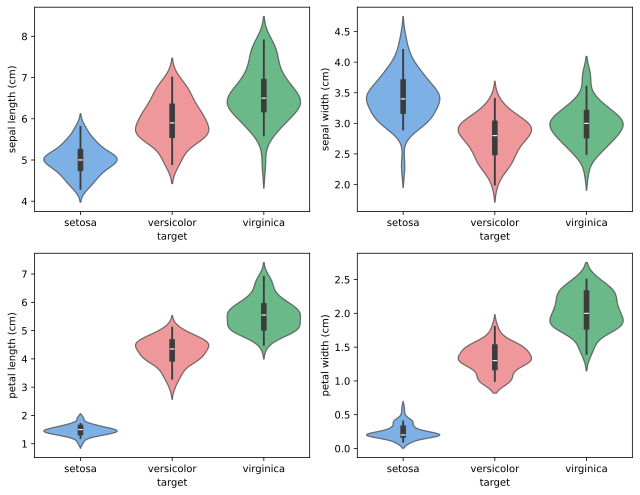

In [6]:
# Visualize the data using violin plots.
fig, axes = plt.subplots(2, 2, figsize=(9, 7))
axes = axes.flatten()
for i, feature in enumerate(iris.feature_names):
    sns.violinplot(x=y_mapped,      # x: Stratify by class
                   y=X[feature],    # y: Feature values
                   hue=y_mapped,    # Color by class
                   alpha=0.7,       # Transparency
                   ax=axes[i])
plt.tight_layout()
ml.save_figure(path="iris_violin_plots.pdf")

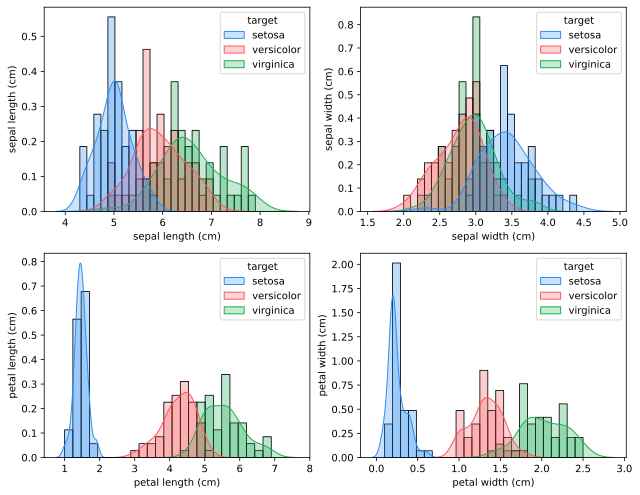

In [7]:
# Visualize the data using histograms.
fig, axes = plt.subplots(2, 2, figsize=(9, 7))
axes = axes.flatten()
for i, feature in enumerate(iris.feature_names):
    sns.histplot(x=X[feature],      # x: Stratify by class
                   #y=X[feature],    # y: Feature values
                   hue=y_mapped,    # Color by class
                   bins=25,
                   stat="density",
                   alpha=0.3,       # Transparency
                   #kde=True,
                   ax=axes[i])
    sns.kdeplot(x=X[feature], hue=y_mapped, fill=True, ax=axes[i])
    axes[i].set_ylabel(feature)
plt.tight_layout()
ml.save_figure(path="iris_histogrm_plots.pdf")

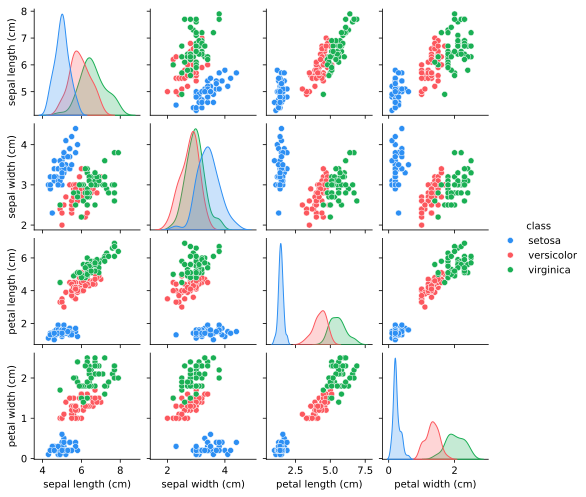

In [8]:
# Pairplots also provide a good overview of the data, by showing 
# the pairwise relationships between features.
Xy = X.copy()
Xy["class"] = y_mapped
g = sns.pairplot(Xy, hue="class", height=7/4, aspect=1);
ml.save_figure(path="iris_pair_plot.pdf")

---

## **Model training**

In this demonstration, we will use a simple logistic regression model to classify the iris dataset.

It is advisable to split the data into a training and a test set. The training set is used to train the model, while the test set is used to evaluate the model's performance on unseen data. In this demonstration, we use a split ratio of 3:1 for training and testing (i.e.: 75% of the samples will be used for training, and 25% for testing)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, 
                                                    test_size = 0.25)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [12]:
# Train a logicitic regression using the training data.
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the classes of the test data.
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model.
print("##############")
print("Accuracy: %.2f" % accuracy_score(y_pred, y_test))
print("##############")

##############
Accuracy: 1.00
##############


In [11]:
########################
###    EXERCISE 2    ###
########################

# a) Identify the main steps in the code above.
# b) Try to formulate in your own words what happens in each step.
#     - What is the purpose of the train_test_split() function?
#     - What happens in the fit() and predict() functions?
#     - Can you guess how the accuracy metric is defined?

---

## **Discussion**

Using just four predictors, we were able to predict the class of the iris flowers with an accuracy of 97%, 
which is a fairly good result, given the simplicity of the model and the amount of effort we put into it.

Furthermore, we discovered that training and validating a logistic regression model with scikit-learn requires only five lines of code.
The relevant functions were:
- [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html): Split the data into training and test sets.
- [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html): Create the estimator object (a logistic regression model).
- [`fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit): Train the model using the training data.
- [`predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict): Predict the classes of the test data.
- [`accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html): Evaluate the accuracy of the model.


### **Estimators**

One of the central components in scikit-learn are the estimators. An estimator is any object that learns from data. This includes models for classification, regression, clustering, and more. Estimator objects in scikit-learn have a consistent interface. For instance, all estimators implement the `fit()` method, which is used to learn the model from
the training data. The below list shows the main methods that are implemented by estimators:

- `model.fit()`: Train the model using training data. For supervised learning applications,
  this accepts two arguments: the feature matrix `X` and the labels `y`: `model.fit(X, y)`
- `model.predict()`: Given a trained model, predict the label of a new set of data.
  This method accepts one argument, the data `X_new` for which the labels are to be predicted:  `y_pred = model.predict(X_new)``
- `model.predict_proba()`: Some classification estimators also provide this method, which 
  returns for each class the estimated probability that a sample belongs to that class. The output is a matrix where the `i-th` row corresponds to the sample `i` and the `j-th` column corresponds to the class `j`.
  In this case (multi-class logistic regression), `model.predict()` returns the label with the highest probability.
- `model.transform()`: This method is not implemented by all estimators, and does not play a role in the case of classifiers. 
 It is used for data transformation methods, such as dimensionality reduction, feature selection, or feature extraction. 
 It accepts one argument `X_new`, and returns the new representation of the data: `X_trans = model.transform(X_new)`
- `model.fit_transform()`: Some transformation estimators implement this method,
  if they require some of the transformation parameters to be learned from data.
  It is a more efficient way to performs a fit and a transform on the same input data at once.

For a complete list of sklearn terms see here: https://scikit-learn.org/stable/glossary.html
